# Compute classification accuracy for behavioral age from ontogeny male dataset

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [101]:
# df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_relabeled_counts_matrix_v00.parquet')
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_relabeled_usage_matrix_v00.parquet')

In [131]:
pipeline = make_pipeline(
    StandardScaler(), PCA(n_components=45), SVC(kernel="linear", C=1, class_weight="balanced")
)
age = df.index.get_level_values("age")
preds = []
for i in range(20):
    predictions = cross_val_predict(
        pipeline,
        df,
        age,
        cv=StratifiedKFold(n_splits=7, shuffle=True, random_state=i),
        n_jobs=-1,
    )
    preds.append(predictions)
cm = [confusion_matrix(age, predictions, normalize='pred') for predictions in preds]
cm = np.mean(cm, axis=0)
acc = round(np.mean([accuracy_score(age, predictions) for predictions in preds]), 3)
acc

0.335

Text(0.5, 1.0, 'SVC Accuracy: 0.34')

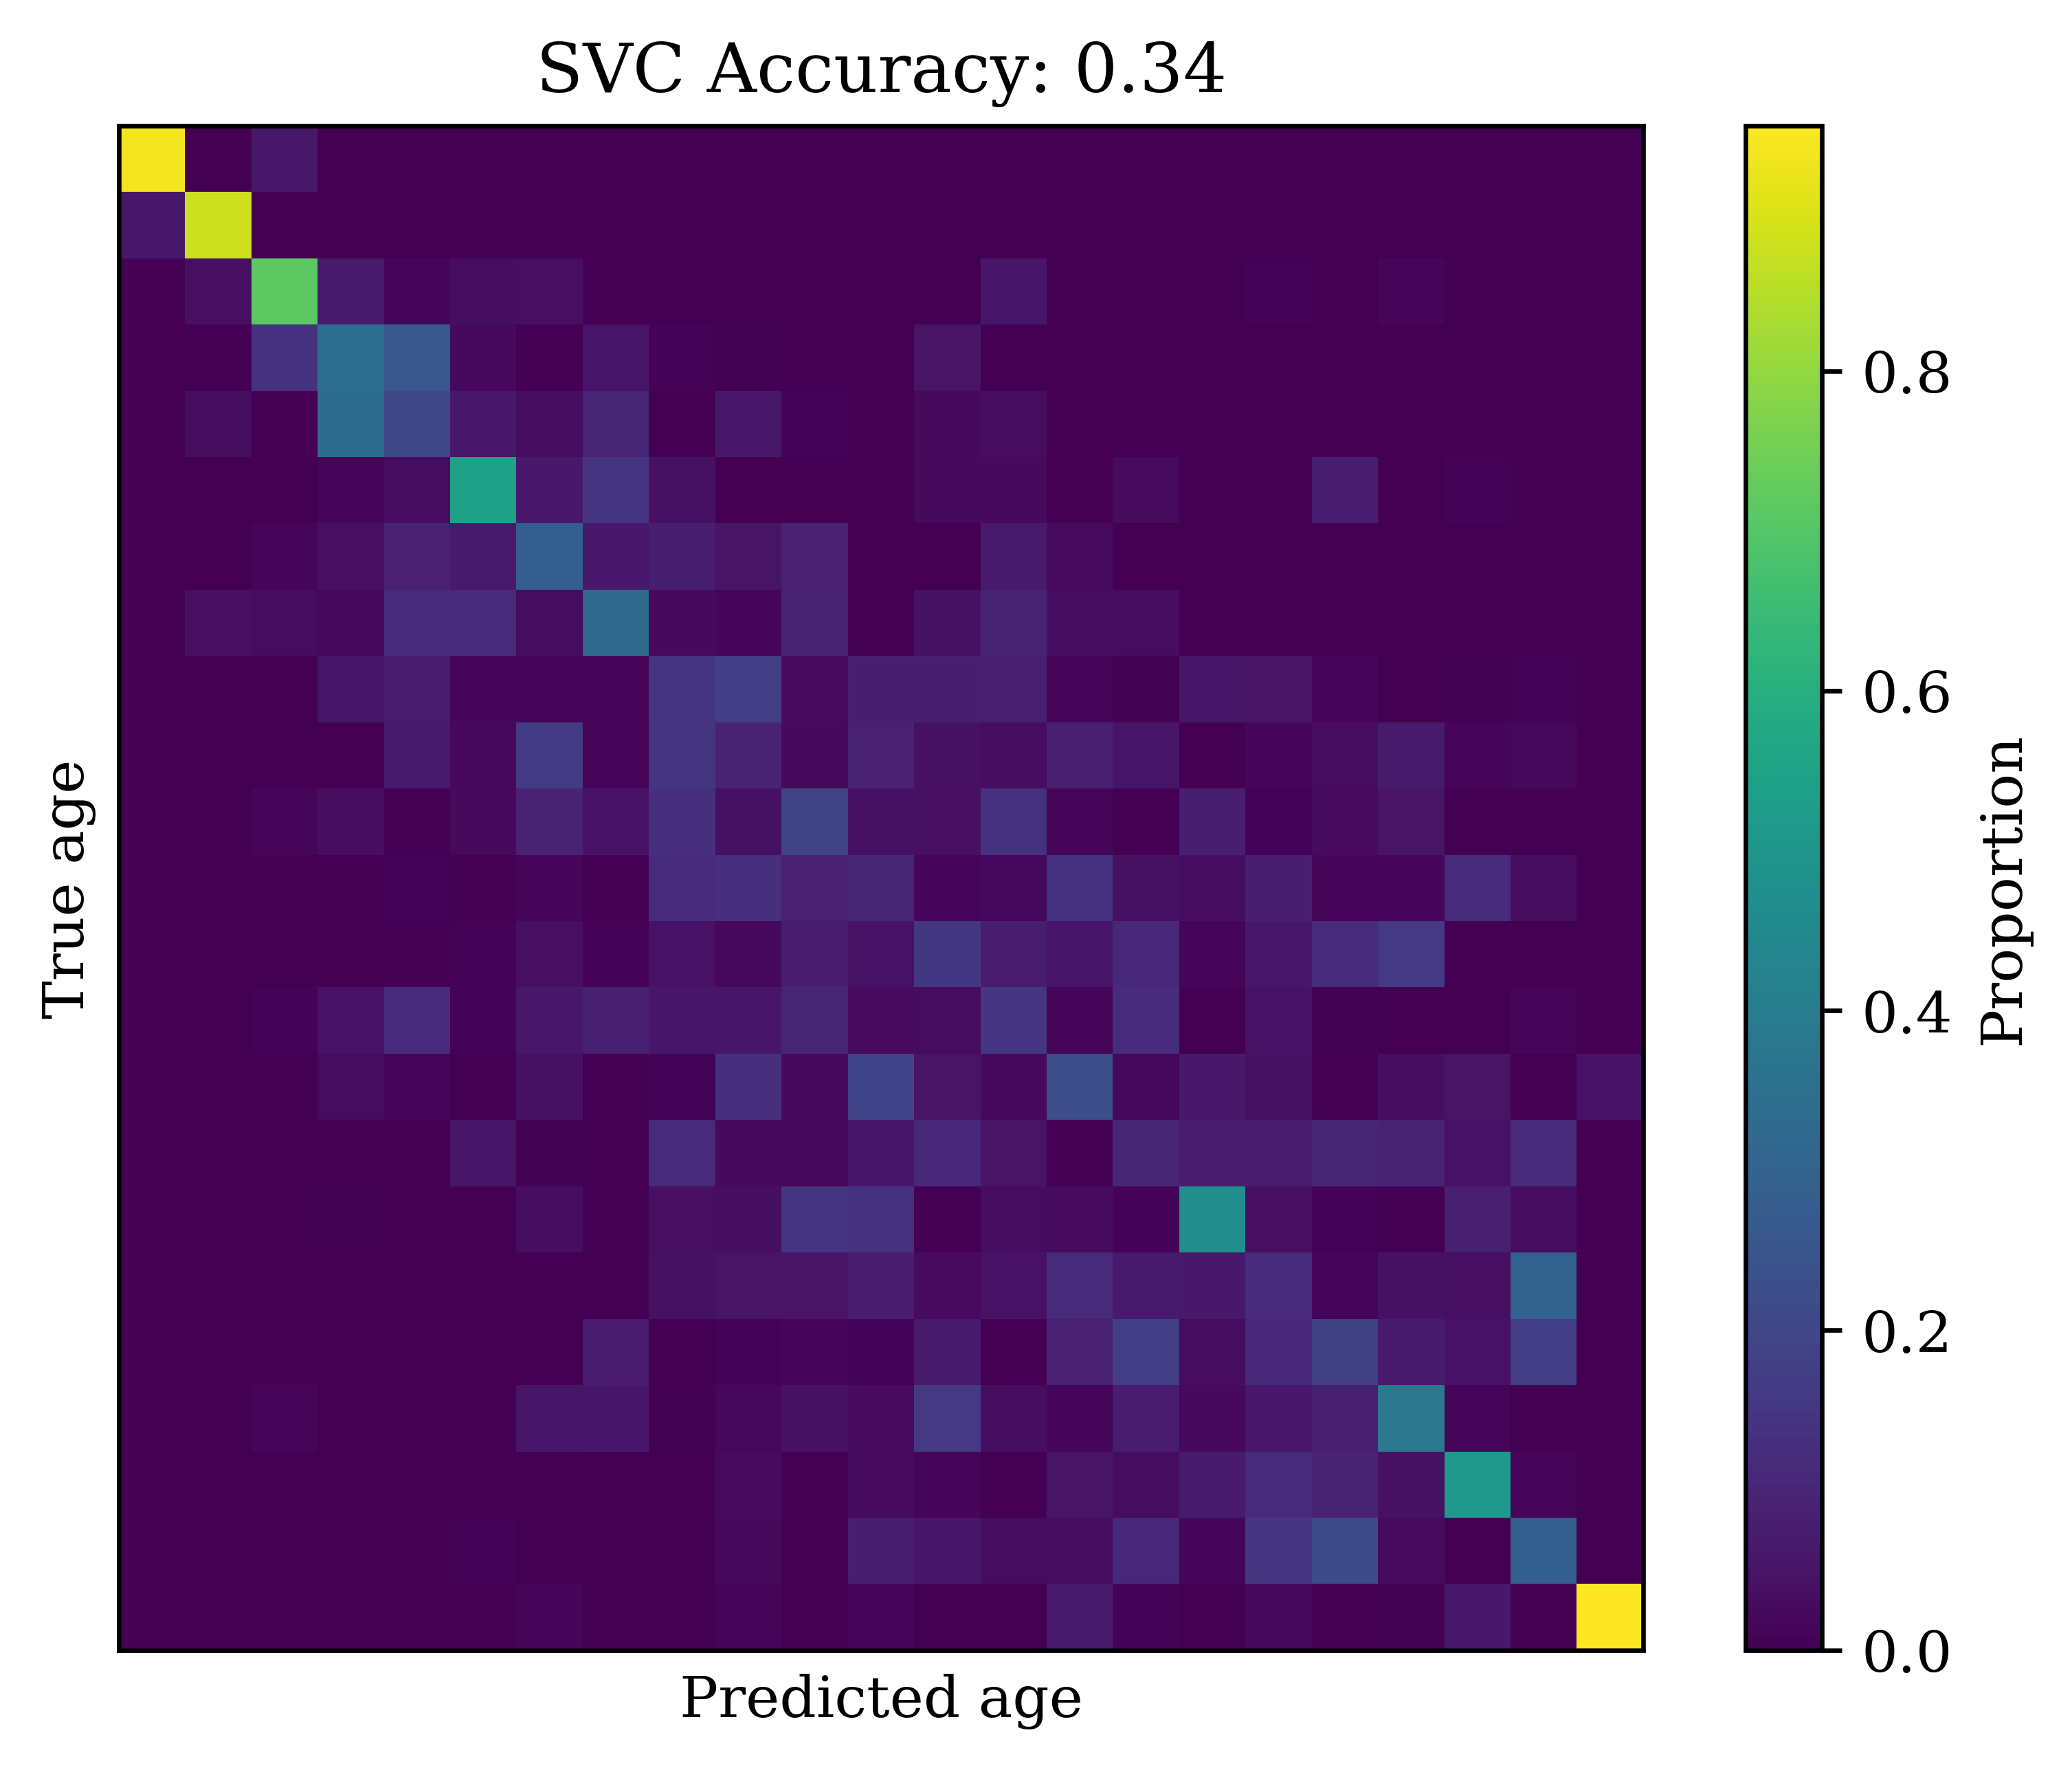

In [132]:
plt.imshow(cm)
plt.xticks([])
plt.yticks([])
plt.colorbar(label="Proportion")
plt.xlabel("Predicted age")
plt.ylabel("True age")
plt.title(f"SVC Accuracy: {acc:0.2f}")

In [129]:
pipeline = make_pipeline(
    RandomForestClassifier(n_estimators=250, class_weight="balanced") 
)
age = df.index.get_level_values("age")
preds = []
for i in range(20):
    predictions = cross_val_predict(
        pipeline,
        df,
        age,
        cv=StratifiedKFold(n_splits=7, shuffle=True, random_state=i),
        n_jobs=-1,
    )
    preds.append(predictions)
cm = [confusion_matrix(age, predictions, normalize='pred') for predictions in preds]
cm = np.mean(cm, axis=0)

acc = round(np.mean([accuracy_score(age, predictions) for predictions in preds]), 3)
acc

0.32

Text(0.5, 1.0, 'RF Accuracy: 0.32')

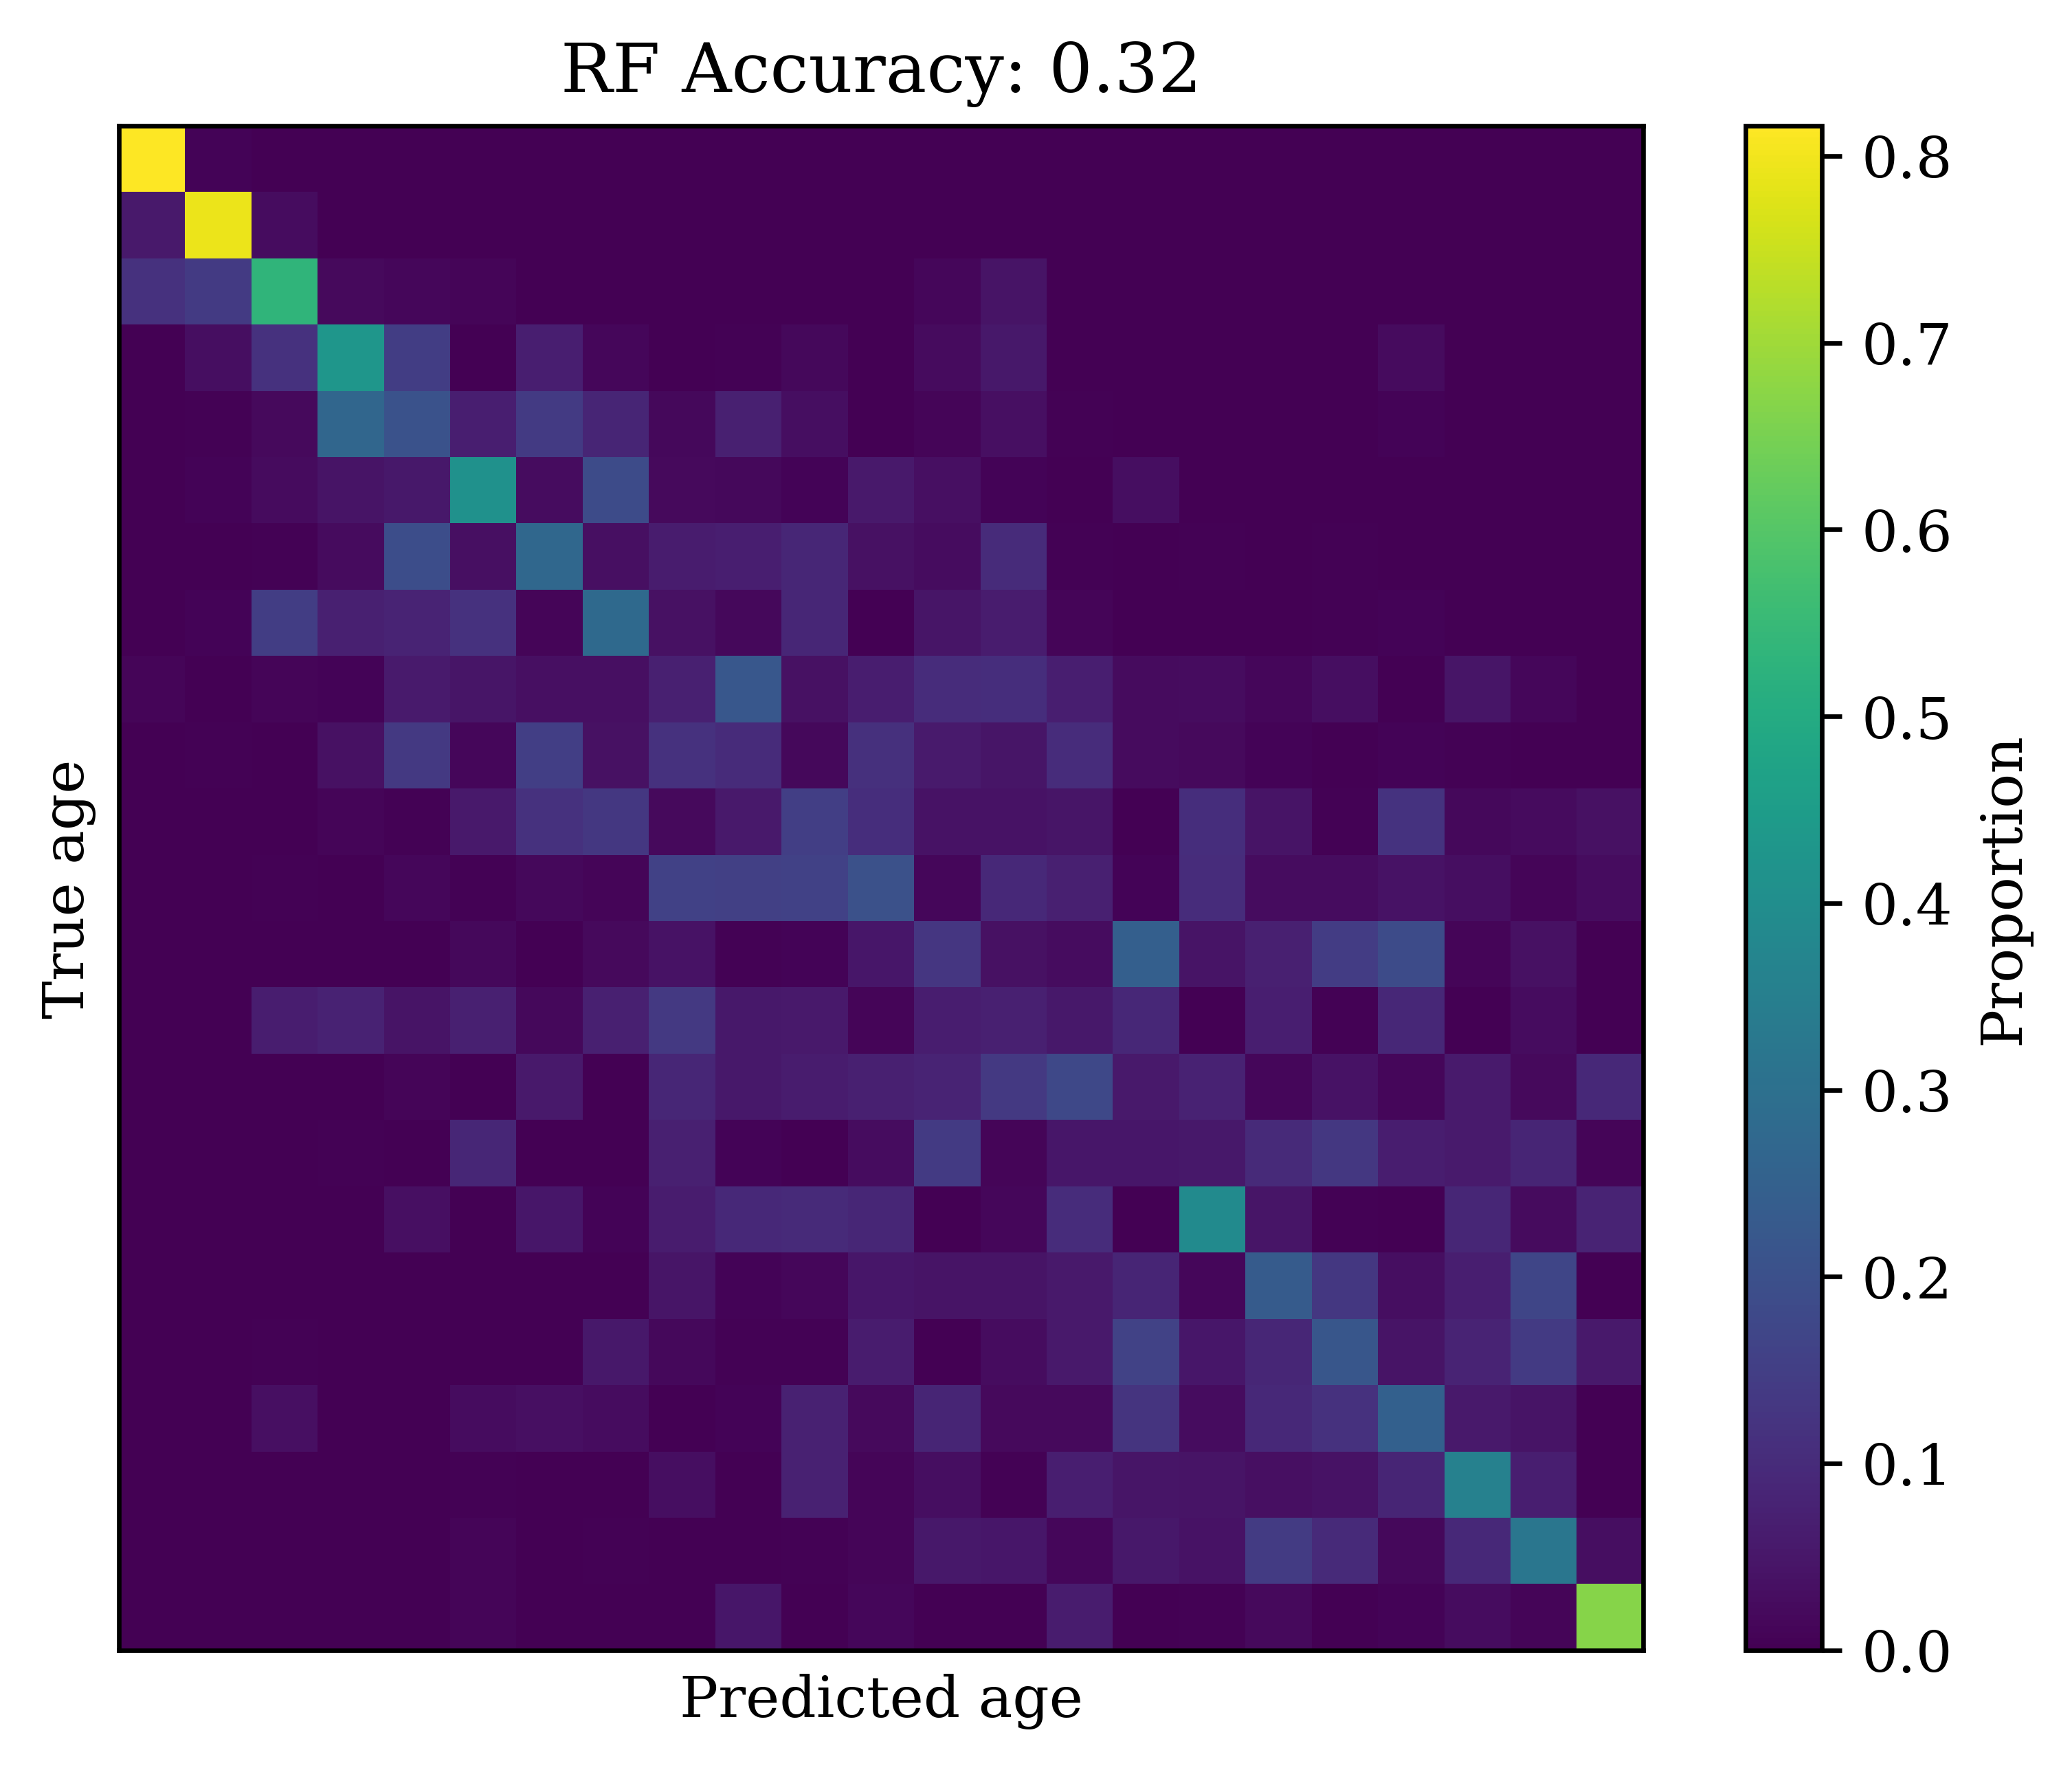

In [130]:
plt.imshow(cm)
plt.xticks([])
plt.yticks([])
plt.colorbar(label="Proportion")
plt.xlabel("Predicted age")
plt.ylabel("True age")
plt.title(f"RF Accuracy: {acc:0.2f}")